# <center> Workshop 2: Extreme Heat</center>


## Introduction

In this session we're going to build on the Statistics Primer and investigate changes to extreme "heat" as a function of global warming. Specifically, the aims of this session are to: 

- Consolidate understanding of "humid" heat and associated metrics;
- Explore statistical methods for estimating the impact of climate change on the frequency of extreme heat events
- Consider climate change "attribution" 
- Begin thinking more concretely about the human impacts from extreme events
 
## Recap

### Statistics 
In our last workshop -- the Statistics Primer -- we explored how *probability distributions* can be used to estimate the probability of an *'event'* (e.g., person's height or meteorological extreme) exceeding a given threshold $x$. This "exceedance probability" is given by 1-*CDF($x$)*, where *CDF* is the cumulative distribution function, and 1/(1-*CDF($x$)*) is the return period (noting that *CDF* is a fraction here -- 0-1, rather than 0-100%). In this session, we will be building on this understanding to evaluate how rare given heat extremes are in the current climate, and seeing how this changes as the global climate warms. 

### Background on extreme heat
In the lecture, we discussed some key aspects of extreme humid heat. The links below provide accessible overviews of the big-picture concerns and directions of travel. Please read them before continuing. 

- [A deadly upper limit to extreme heat](https://theconversation.com/global-warming-now-pushing-heat-into-territory-humans-cannot-tolerate-138343)

- [Where is the hottest place on Earth?](https://drive.google.com/file/d/1nL0L8owZXXnxiinZ4hoUBVPIJFUt4HE_/view?usp=sharing) 

In this workshop, we will be using a metric called the "modified discomfort index" (the "mdi"). It is a simple weighted average of the wet-bulb (weight=0.75) and dry-bulb (weight=0.3) air temperatures. It is therefore a measure that captures the extent of *humid* heat. **Note that the mdi is *very* similar to the widely used "wet-bulb globe temperature (WGBT)"**. The only difference is that WBGT uses a weight of 0.7 (rather than 0.75) for the wet-bulb temperature. 

For the purposes of today's work, a **very important* threshold in the mdi is a value of 37.8$^{\circ}$C**. Emerging research indicates that this is a better indicator of the upper-limit to human heat tolerance than the 35$^{\circ}$C wet-bulb threshold, so we will use it here. 
### Case study 
We will be using 1981-2020 annual maximum mdi data computed from three-hourly [ERA5-Land](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview) data for the city of [Larkana, Pakistan](https://en.wikipedia.org/wiki/Larkana). 

How hot does it get in Larkana? Let's being our programming/analysis by finding out: we will start by ploting the annnual maxima mdi time series. 

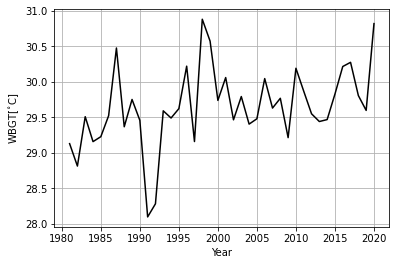

In [195]:
# Show data -- raw, and with tas
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import scipy
from scipy import stats
from src import utils
fin="Data/tw_Doha Industrial Area_Qatar"
data=pd.read_csv(fin)
years=np.arange(1981,2021)
tw=data["tw"].values[:]+0
t=data["dT"].values[:]
fig,ax=plt.subplots(1,1)
ax.plot(years,mdi,color='k')
ax.set_ylabel("WBGT[$^{\circ}$C]")
ax.set_xlabel("Year")
ax.grid()

It's hot! As you may have guessed from the readings linked in the Introduction, this is one of the most heat-stressed locations on Earth. 

However, whilst the heat is extreme, the maximum value recorded 1981-2020 (34.9$^{\circ}$C) is still quite a way (~3$^{\circ}$C) from the 37.8$^{\circ}$C threshold. 

Today, we will be evaluating how rare exceedances of the mdi are above given thresholds (including 37.8$^{\circ}$C) under different climates, by evaluating the *CDF* of a probability distribution that fits the observed values well (i.e., that we think represents the *population*). Knowing how to selecting this correct distribution is a little beyond the scope of our session, but some guidance is covered in Chapter 4 of the [Wilks textbook](https://ebookcentral.proquest.com/lib/lboro/reader.action?docID=689817). Here, we will assume that the [generalized extreme value distribution - 'GEV'](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution) is the parent population, as is [often the case for annual maximum heat indices](https://ascmo.copernicus.org/articles/6/177/2020/). 

Make sure you run the code below to see how well the GEV distribution matches with our sample. 

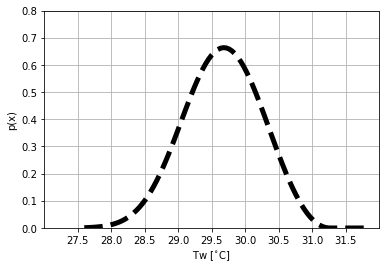

In [196]:
xref=np.linspace(tw.min()-0.5,tw.max()+1,100)
fig,ax=plt.subplots(1)
#bins=[39.2,39.4,39.6,39.8,40.0,40,.2,40.4,40.6,40.8,41]
#n,bins,patches=ax.hist(tw,bins=15,density=True,facecolor='red',edgecolor='k')
fit=utils.optimize_gev(tw,-0.1,29,1)
shape,loc,scale=fit.x
p=utils.gev_pdf(xref,shape,loc,scale)
ax.plot(xref,p,color='k',linewidth=5,linestyle="--")
ax.grid()
ax.set_xlabel("Tw [$^{\circ}$C]")
ax.set_ylabel("p(x)")
ax.set_xticks(bins)
ax.set_xlim(27.,32)
ax.set_ylim(0,0.8)
ax.set_xticks([27.5,28,28.5,29,29.5,30,30.5,31,31.5])




30.821853197655173

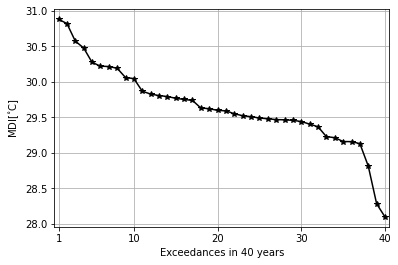

In [197]:
y=mdi[np.argsort(mdi)[::-1]]
fig,ax=plt.subplots(1,1)
x=np.arange(1,41)
ax.plot(x,y,marker='*',color='k')
ax.grid()
ax.set_ylabel("MDI[$^{\circ}$C]")
ax.set_xlabel("Exceedances in 40 years")
ax.set_xlim(0.5,40.5)
ax.set_xticks([1,10,20,30,40])
y[1]

In [198]:
fit.x

array([-0.32682327, 29.46459763,  0.58894755])

The GEV distribution is characterised by three parameters:

- "**shape**": $\xi$

- "**location**": $\mu$

- "**scale**": $\sigma$ 


For our data, we find the following parameters values:

- $\xi$ = -0.47
- $\mu$ = 34.13
- $\sigma$ = 0.42

We can use this fitted GEV distribution to evaluate 1-*CDF* at any value and establish its return period. Run the code below to do this for a value of 34.8 $^{\circ}$C and have the result print to screeen. 

If you're a visual learner, the plot generated by the code should also help you grasp this evaluation of the *CDF*. The shaded red area highlights the *area under the curve* to the **right** of 34.8 $^{\circ}$C; the shaded green green patch is the area under the curve to the **left** of 34.8 $^{\circ}$C. Recall that this this curve is the probability density; the green area is the *CDF* for x=34.8 $^{\circ}$C and the red area is 1-*CDF*($x$=34.8).

You might be wondering why we're querying 34.8$^{\circ}$C -- 3$^{\circ}$C below the important 37.8$^{\circ}$C threshold. The reason is that a GEV distribution with a negative shape paramater has 'support' for values above negative infinity (so no problem there) but below μ − σ / ξ. In this case, that's 34.13 -0.42/-0.47 = 35.02, meaning 35.02$^{\circ}$C is the theoretical upper limit of support. That means, according to the GEV, values above that can be regarded as (statistically) impossible. Interestingly, [emerging research](https://journals.ametsoc.org/view/journals/clim/aop/JCLI-D-20-0916.1/JCLI-D-20-0916.1.xml) is suggesting that this upper bound may also be physically plausible. For now, just appreciate that we're not querying he probability of 37.8$^{\circ}$C because the GEV we fitted indicates that this would be impossble -- it's beyond the upper bound of 35.02$^{\circ}$C. 


1-CDF = 7.1 %, so return period for 30.5C [1/(1-CDF)] = 14.2 years
30.5


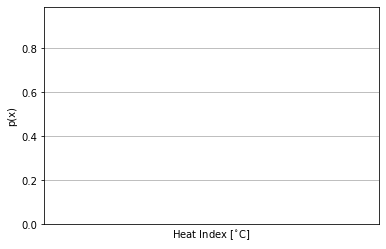

In [199]:
qp=30.5
d=utils.gev_cdf(qp,shape,loc,scale)
#w_shape,w_loc,w_scale=stats.weibull_max.fit(tw)
#qp=stats.weibull_max.ppf(0.99,w_shape,w_loc,w_scale)
print(r'1-CDF = %.1f %%, so return period for %.1fC [1/(1-CDF)] = %.1f years'%(100-d*100.,qp,(1/(1-d))))
xref=np.linspace(tw.min()-1,tw.max()+1,1000)
fig,ax=plt.subplots(1)
ax.hist(tw,bins=7,density=True,facecolor='w',edgecolor='k',alpha=0.3)
shape,loc,scale=fit.x
pdf=utils.gev_pdf(xref,shape,loc,scale)

ax.plot(xref,pdf,color='black',linewidth=3)
xl=xref[xref<=qp]
xu=xref[xref>qp]
ax.fill_between(xl,np.zeros(len(xl)),pdf[xref<=qp],color='green')
ax.fill_between(xu,np.zeros(len(xu)),pdf[xref>qp],color='red')
ax.grid()
ax.set_xlabel("Heat Index [$^{\circ}$C]")
ax.set_ylabel("p(x)")
ax.set_xticks(bins)
ax.set_xlim(39.,41.2)
print(qp)

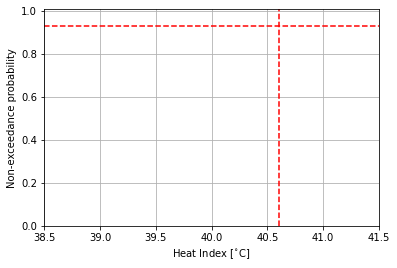

In [200]:
xref=np.linspace(mdi.min()-1,mdi.max()+1,1000)
d=utils.gev_cdf(xref,shape,loc,scale)
fig,ax=plt.subplots(1)
ax.plot(xref,d,color='k',linewidth=3)
ax.grid()
ax.set_xlabel("Heat Index [$^{\circ}$C]")
ax.set_ylabel("Non-exceedance probability")
ax.set_ylim(0,1.01)
ax.set_xlim(38.5,41.5)
ax.axvline(40.6,linestyle='--',color='red')
di=utils.gev_cdf(qp,shape,loc,scale)
ax.axhline(di,color='red',linestyle="--")

## Accounting for the impact of warming: adding in 'non-stationarity'

The keen-eyed amongst you may have noticed the upward trend in mdi when we plotted the series above. Below, this trend is highlighted (left) by the (dotted) best-fit line, where we also plot global mean warming since pre-industrial (with trend also shown by a dotted line). Note that the two series exhibit a reasonably strong degree of covariation, both trending clearly upward since around 1990. On the right we highlight this correlation between global mean air temperature since pre-industrial, and annual maxima in the mdi, using a scatter plot. Note that the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between these variables is 0.5, and is highly significant (*p*<0.01).

Make sure you run the code to generate the plots!


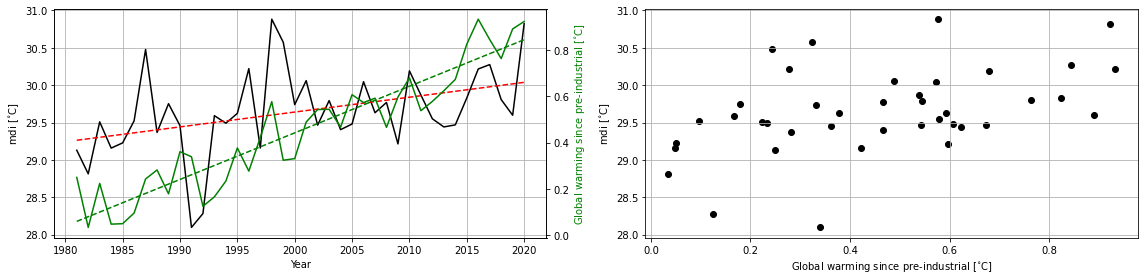

In [201]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,4)
ax.flat[0].plot(years,mdi,color='k')
ax.flat[0].plot(years,np.polyval(np.polyfit(years,mdi,1),years),color='red',linestyle='--')
ax.flat[0].set_ylabel("mdi [$^{\circ}$C]")
ax.flat[0].set_xlabel("Year")
ax.flat[0].grid()
ax.flat[1].scatter(t,mdi,color='k')
ax.flat[1].set_xlabel("Global warming since pre-industrial [$^{\circ}$C]")
ax.flat[1].set_ylabel("mdi [$^{\circ}$C]")
ax.flat[1].grid()
ax2=ax.flat[0].twinx()
ax2.plot(years,t,color='green')
ax2.plot(years,np.polyval(np.polyfit(years,t,1),years),color='green',linestyle='--')
ax2.set_ylabel("Global warming since pre-industrial [$^{\circ}$C]",color='green')
plt.tight_layout()

Intuitively, we would expect this upward trend in the mdi to mean that the probability of the mdi exceeding a given threshold has increased with time (or, equivalently, with global warming amount). For example, we would expect that the return period of a 34.8$^{\circ}$C event would be smaller in 2020 (which was, globally, around 0.9C above pre-industrial), than it was in 1981 (0.25$^{\circ}$C above pre-industrial). 

Fortunately, we can account for this *non-stationarity* with our definition of the GEV distribution. We can make the *location* parameter a function of global mean air temperature. In essence, this allows us to shift the distribution to the right (i.e., to higher values). In the code below, we make the *location* paramater a simple linear *function* of global mean warming amount:

$\mu$ = $\beta_{1}T+\beta_{2}$ 

In words: location = global mean warming since pre-industrial ($T$) times the paramater $\beta_{1}$ plus the paramater $\beta_{2}$. 

Don't worry too much about how the values of $\beta_{1}$ $\beta_{2}$ are determined, but the quick answer is that there's an algorithm behind the scenes that tries to find the best match to our data. Technically, we're trying to find the paramater values that "maximize the likelihood" of observing our mdi values. You can read about this also in Chapter 4 of the [Wilks textbook](https://ebookcentral.proquest.com/lib/lboro/reader.action?docID=689817). To help gain an intuition for the most important bits, though, note that the amount the *PDF* is "shifted" (by adjusting the scale), is set by $\beta_{1}$, which in turn depends on how sensitive the mdi was to changes in global mean air temperature during the 1981-2020 period. In the fitting conducted in the code below, we find that the location paramater changes (i.e., shifts right) by 0.7$^{\circ}$C for every 1$^{\circ}$C of global warmng. 

We can test whether a non-stationary skew normal distribution is an improvement over the stationary skew normal  by evaluating the [Akaike Information Criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) for both distributions. The lower the AIC, the better the distribution -- even when accounting for (penalising) increasing complexity. More on the AIC -- and non-stationarity in extremes -- can be found in [Slater et al. (2021)](https://hess.copernicus.org/articles/25/3897/2021/). 

The AIC for our non-stationary model (fitted below) is considerably lower than than for the stationary model (35.5 vs. 42.6), so we will persist with its use. 

Let's now see the non-stationary distribution in action. Below, we plot the *PDF* for the given amount of global warming annotated above each subplot. On each subplot, the dotted red-line marks 34.8$^{\circ}$C, and the shaded green and red areas retain the same meaning as before. 

/home/lunet/gytm3/Teaching/GYP050/Public/src/utils.py:33: RuntimeWarning: divide by zero encountered in log
  nll=-np.log(np.prod(p[~np.isnan(p)]))


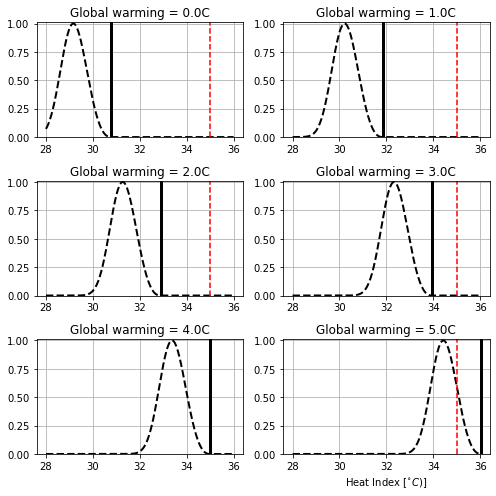

In [202]:
qp=30.5
#tw-=1.5
xref=np.linspace(28,36,1000)
fit=utils.ns_optimize_gev(tw,shape,scale,np.min(mdi),1,t)
shape,scale,alpha,beta=fit.x
fit_stat=utils.optimize_gev(tw,-0.1,31,0.5)
shape_stat,loc_stat,scale_stat=fit_stat.x
ln=np.log(np.prod(np.array([utils.ns_gev_pdf(tw[ii],shape,scale,alpha,beta,t[ii])\
                                 for ii in range(len(tw))])))
ln_s=np.log(np.prod(np.array([utils.gev_pdf(ii,shape_stat,loc_stat,scale_stat) \
                                       for ii in tw])))
aic=2*4-2*ln
aic_s=2*3-2*ln_s
temps=[0,1,2,3,4,5]
fig,ax=plt.subplots(3,2)
fig.set_size_inches(7,7)
for ti in range(len(temps)):
        pdf=utils.ns_gev_pdf(xref,shape,scale,alpha,beta,temps[ti])
        pdf/=np.nanmax(pdf)
        ax.flat[ti].plot(xref,pdf,color='k',linestyle="--",linewidth=2)
        ax.flat[ti].set_title("Global warming = %.1fC"%temps[ti])
        ax.flat[ti].grid()
        ax.flat[ti].axvline(35,color='red',linestyle='--')
        #ax.flat[ti].fill_between(xref[xref<=qp],np.zeros(len(xref[xref<=qp])),pdf[xref<=qp],color='green')
        #ax.flat[ti].fill_between(xref[xref>qp],np.zeros(len(xref[xref>qp])),pdf[xref>qp],color='red')
        ax.flat[ti].set_ylim(0,1.01)
        upp_bound=alpha+beta*temps[ti]-scale/shape
        ax.flat[ti].axvline(upp_bound,color='k',linewidth=3)
ax.flat[ti].set_xlabel("Heat Index [$^{\circ}C)$]")
plt.tight_layout()
fig.savefig("Demo.png",dpi=300)

In [203]:
beta

1.0524235873835652

Wow! That's some sensitivity. Out analysis shows that, for 0$^{\circ}$C of warming (i.e.,in the pre-industrial climate) an mdi of 34.8$^{\circ}$C would be vanishingly rare; and the ~1$^{\circ}$C of warming we have *already* seen has greatly increased the probability of observing an mdi above 34.8$^{\circ}$C). By the time warming reaches 2$^{\circ}$C, we should regard a year in which the annual maximum mdi only reaches 34.8$^{\circ}$C) to be an unusually *cool*.  

In the last panel (global warming of 4.0$^{\circ}$C), it even looks as if 37.8$^{\circ}$C may be very close to the upper bound of the GEV distribution. Let's explore this more. 

Below, the changing probability of exceeding the two thresholds (34.8 and 37.8$^{\circ}$C) is shown more clearly. We evaluate and plot 1-*CDF*(35) and 1-*CDF*(37.8) for different values of global warming amount (the values on the x-axis). We also show the evolution of the GEV's upper bound (i.e., the maximum theoretical mdi that could be supported). 

(0.0, 100.0)

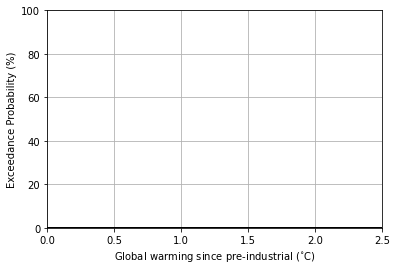

In [204]:
fig,ax=plt.subplots(1,1)
ti=np.arange(0,2.6,0.1)
p35=np.array([(1-utils.ns_gev_cdf(41,shape,scale,alpha,beta,ii))*100 for ii in ti])

#p378=np.array([(1-utils.ns_gev_cdf(37.8,shape,scale,alpha,beta,ii))*100 for ii in ti])
# μ − σ / ξ. 
upp_bound=alpha+beta*ti-scale/shape # this is the theoretical upper bound
ax.plot(ti,p35,label="41C",color='k',linewidth=2)
#ax.plot(ti,p378,label="37.8C")
ax.grid()
#ax.legend()
ax.set_xlabel("Global warming since pre-industrial ($^{\circ}$C)")
ax.set_ylabel("Exceedance Probability (%)")
#ax2=ax.twinx()
ax.set_xlim(0,2.5)
ax.set_ylim(0,100)
#ax2.plot(ti,upp_bound,color='red',linestyle=":")

#ax2.set_ylabel("GEV upper bound ($^{\circ}$C)",color='red')

In [205]:
ti=np.linspace(0,4,100)
out=np.zeros(len(ti))
count=0
for t in ti:
    xref=np.linspace(np.min(mdi)-1,np.max(mdi)+t+1)
    _=np.squeeze(np.array([utils.ns_gev_cdf(ii,shape,scale,alpha,beta,t) for ii in xref]))
    p99=np.interp(0.99,_,xref)
    out[count]=p99; count+=1


(0.0, 4.0)

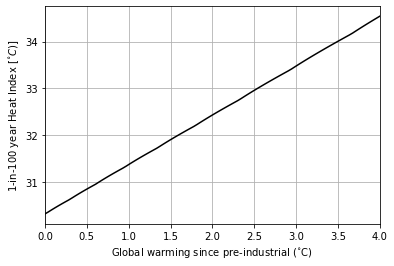

In [206]:
fig,ax=plt.subplots(1,1)
ax.plot(ti,out,color='k')
ax.grid()
ax.set_xlabel("Global warming since pre-industrial ($^{\circ}$C)")
ax.set_ylabel("1-in-100 year Heat Index [$^{\circ}C)$]")
ax.set_xlim(0,4)

## Summary
OK. We've covered quite a lot of new ground here, so let's recap. 

We fitted a skew normal distribution to our 40-year sample of annual maximum mdi (1981-2020). We used this distribution to illustratively compute the exceedance probability (and return period) for an mdi of at least 35$^{\circ}$C, obtaining a result of 1.2 % (~85 years). 

We provisioned for the impact of climate warming by making the skew normal distribution non-stationary, allowing the location parameter to move with global warming amount. The amount the location shifted per degree of global warming (0.8$^{\circ}$C) was determined by the historical relationship between annual maximum mdi and changes in global mean air temperature. We found the value for this parameter (and for all paramaters in the distributions used) by maximising the likelihood of observing our data.

The non-stationary distribution could then be used to evaluate the exceedance probability of a given mdi value for any scenario of warming. Some more examples of this type of analysis being used to assess changes in the probability of extremes -- in the context of *attribution* can be read about in [Oldenborgh et al. (2021)](https://link.springer.com/article/10.1007/s10584-021-03071-7) and [Philip et al. (2021)](https://ascmo.copernicus.org/articles/6/177/2020/) 

A key feature of this approach is that at no point did we use a climate model to infer future changes to extreme heat. Instead our approach simply assumed that the past relationship between global mean air temperature and annual maximum mdi in Larkana will remain unchanged as the climate warms. 

Note that an important simplifcation to our analysis was that we did not assess the impact of [sampling error](https://en.wikipedia.org/wiki/Sampling_error) on our estimated paramaters. Doing so would have provided us with a *range* of likely exceedance probabilities/return periods for all the mdi thresholds and warming amounts we queried.  

Need help? Please either ask, or if you prefer, submit questions [here](https://docs.google.com/forms/d/e/1FAIpQLSeliMGJUaQtqFijUM-oIBZQxG1F38gehAeg3l3f1KbY1rcV9g/viewform?usp=sf_link) for Tom to answer.


## Consolidating your learning

Please answer the questions below and have Tom check them. 

(1) Approximately how much global warming is required until there is a 50 % chance of the annual maximum mdi exceeding:

- [a] 34.8$^{\circ}$C

- [b] 37.8$^{\circ}$C ?

(2) What is the (approximate) return period for an mdi exceeding 35$^{\circ}$C in a climate 1.5$^{\circ}$C warmer than pre-industrial?

(3) How much global warming is required until we could *attribute* an exceedance of 34.8$^{\circ}$C in Larkana to climate change? 

*Think carefully about this one. To help, you can enter different values of 'dt' (the amount of global warming) in the code cell below. Each time the cell is run, it will print to screen the probability of exceeding 34.8$^{\circ}$C (and return period) in a climate dt$^{\circ}$C warmer than pre-industrial.* 


In [207]:
#### Change the value of dt below
dt=0.5 # => global warming amount (deg C) since pre-industrial
######
nx=1-utils.ns_gev_cdf(34.8,shape,scale,alpha,beta,dt)
ret=np.round(1/nx)
print("For global warming of %.1fC, probability of exceeding 34.8C is %.2f%% (it would be a ~1-in-%.0f year event)"\
      %(dt,nx*100,ret))


For global warming of 0.5C, probability of exceeding 34.8C is 0.00% (it would be a ~1-in-inf year event)


<ipython-input-207-602c0bf7d3c5>:5: RuntimeWarning: divide by zero encountered in true_divide
  ret=np.round(1/nx)


## Before next session: thinking about impacts

We are next turning our attention to the human impacts of extreme heat -- and what can be done to minimize them. Some of the relevant ideas were introduced in the lecture, but to consolidate (and develop them), please extract the headline findings fromt the following papers: 

- [Mora et al., (2017a)](https://www.nature.com/articles/nclimate3322)

- [Dunne et al. (2013)](https://www.nature.com/articles/nclimate1827)

- [Day et al. (2019)](https://www.tandfonline.com/doi/pdf/10.1080/14693062.2018.1517640)

- [WHO (2008)](https://www.euro.who.int/__data/assets/pdf_file/0006/95919/E91347.pdf) 

Make sure you capture (i) any differences in the *types* of impact; and (ii) general "adaptation" strategies. We will be diving into (ii) during the next workshop. Preparing now will help you to hit the ground running. 